In [97]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

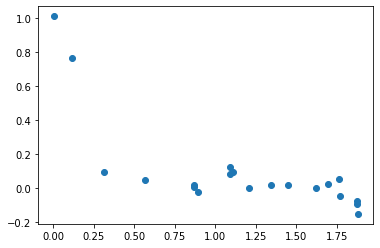

In [98]:
x = np.random.uniform(0, 2, size=20).reshape((-1,1))
y = (1+25*x**2)**-1 + np.random.normal(scale=0.1, size=x.shape)

plt.scatter(x, y)

In [99]:
def gaussElim(a,b):
    n = len(b)
    for k in range(0,n-1):
        for i in range(k+1,n):
            if a[i,k] != 0.0:
                lam = a[i,k] / a[k,k]
                a[i,k+1:n] = a[i,k+1:n] - lam*a[k,k+1:n]
                b[i] = b[i] - lam*b[k]
    for k in range(n-1,-1,-1):
        b[k] = (b[k] - np.dot(a[k,k+1:n],b[k+1:n]))/a[k,k]
    
    return b

In [100]:
class LinearRegression:
    def __init__(self, x, y, p, n):
        self.x = x
        self.y = y
        self.p = p

        self.n = n + 1

        self.train()

    def train(self):
        mat = [[0] * self.n for _ in range(self.n)]
        b = []

        for i in range(self.n):
            for j in range(self.n):
                mat[i][j] = np.dot(self.p, self.x ** (i + j))
            b.append(np.dot(self.y, self.p * (self.x ** i)))

        mat = np.array(mat)
        self.a = np.array(gaussElim(mat, b))

    def get_func_value(self, x):
        return np.polyval(self.a[::-1], x)


In [101]:
x = x.reshape(-1)
x.shape

(20,)

In [102]:
y = y.reshape(-1)
y.shape

(20,)

In [103]:
p = np.ones_like(x)

### Полином степени 1

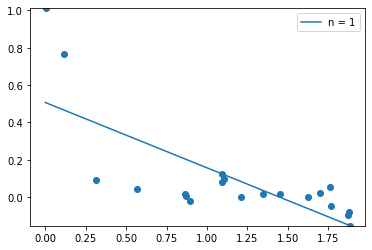

In [104]:
l1 = LinearRegression(x, y, p, 1)
fig, ax = plt.subplots()
ax.scatter(x, y)

x_temp = np.linspace(0, max(x), len(x) * 10)
y_temp = [l1.get_func_value(i) for i in x_temp]
ax.plot(x_temp, y_temp, label="n = 1")

ax.set_ylim(min(y), max(y))
ax.legend()
plt.show()


### Полином степени 2

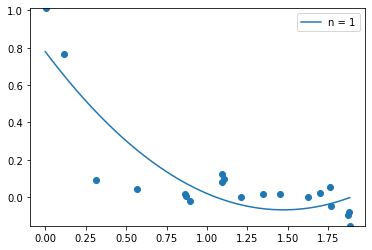

In [105]:
l1 = LinearRegression(x, y, p, 2)
fig, ax = plt.subplots()
ax.scatter(x, y)

x_temp = np.linspace(0, max(x), len(x) * 10)
y_temp = [l1.get_func_value(i) for i in x_temp]
ax.plot(x_temp, y_temp, label="n = 1")

ax.set_ylim(min(y), max(y))
ax.legend()
plt.show()


### Полином степени 4

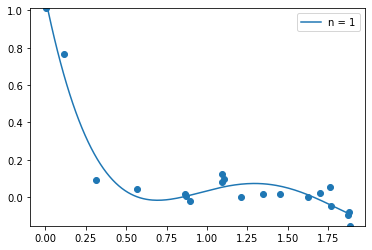

In [106]:
l1 = LinearRegression(x, y, p, 4)
fig, ax = plt.subplots()
ax.scatter(x, y)

x_temp = np.linspace(0, max(x), len(x) * 10)
y_temp = [l1.get_func_value(i) for i in x_temp]
ax.plot(x_temp, y_temp, label="n = 1")

ax.set_ylim(min(y), max(y))
ax.legend()
plt.show()


In [107]:
temp = np.hstack((x.reshape(-1, 1), y.reshape(-1, 1)))
temp = list(sorted(temp, key=lambda x: x[0]))
temp = np.array(temp)
temp


array([[ 3.20398692e-03,  1.01056519e+00],
       [ 1.18485999e-01,  7.64231115e-01],
       [ 3.13698675e-01,  9.18142044e-02],
       [ 5.68257007e-01,  4.60115465e-02],
       [ 8.66689603e-01,  1.46306625e-02],
       [ 8.70787968e-01,  7.60451925e-03],
       [ 8.93632577e-01, -2.19567851e-02],
       [ 1.09059071e+00,  1.21663742e-01],
       [ 1.09312001e+00,  8.10476268e-02],
       [ 1.10709555e+00,  9.47644243e-02],
       [ 1.21021615e+00,  7.40774675e-04],
       [ 1.34464641e+00,  1.57041320e-02],
       [ 1.45033714e+00,  1.51655575e-02],
       [ 1.62337117e+00,  9.95498099e-04],
       [ 1.69665604e+00,  2.31105352e-02],
       [ 1.76166284e+00,  5.43258200e-02],
       [ 1.76756910e+00, -4.78319036e-02],
       [ 1.87390359e+00, -9.64306426e-02],
       [ 1.87612142e+00, -7.75130788e-02],
       [ 1.88180201e+00, -1.53400498e-01]])

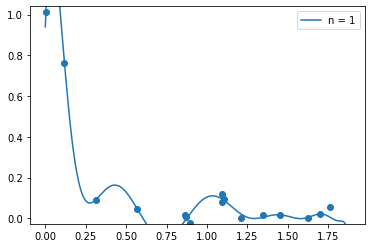

In [122]:
l1 = LinearRegression(temp[:,0], temp[:,1], p, len(x) - 1)
fig, ax = plt.subplots()
ax.scatter(temp[:,0], temp[:,1])

x_temp = np.linspace(0, max(temp[:,0]), len(temp[:,0]) * 10)
y_temp = [l1.get_func_value(i) for i in x_temp]
ax.plot(x_temp, y_temp, label="n = 1")

ax.set_ylim(min(temp[:,0]) - 0.03, max(temp[:,1]) + 0.03)
ax.legend()
plt.show()

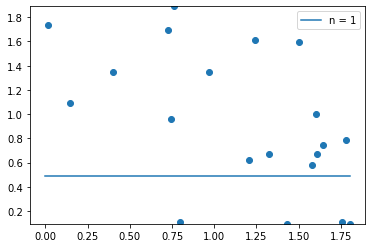

In [123]:

l1 = LinearRegression(x, y, p, 0)
fig, ax = plt.subplots()
ax.scatter(x, y)

x_temp = np.linspace(0, max(x), len(x) * 10)
y_temp = [l1.get_func_value(i) for i in x_temp]
ax.plot(x_temp, y_temp, label="n = 1")

ax.set_ylim(min(y), max(y))
ax.legend()
plt.show()

In [128]:
a0 = (np.dot(p, y)) / sum(p)
a0

0.48866049624428415

In [132]:
len(y[y >= a0])

16

In [133]:
len(y[y <= a0])

4

In [138]:
x_c = np.dot(x, p) / sum(p)
y_c = np.dot(y, p) / sum(p)

In [140]:
x_c, y_c

(1.6843438336145689, 0.48866049624428415)

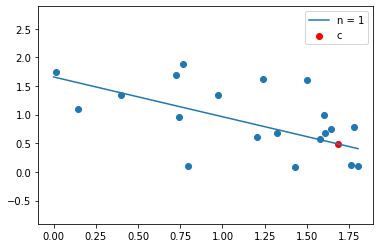

In [157]:
l1 = LinearRegression(x, y, p, 1)
fig, ax = plt.subplots()
ax.scatter(x, y)

x_temp = np.linspace(0, max(x), len(x) * 10)
y_temp = [l1.get_func_value(i) for i in x_temp]
ax.plot(x_temp, y_temp, label="n = 1")
ax.scatter(x_c, y_c, color='red', label="c")

ax.set_ylim(min(y) - 1, max(y) + 1)
ax.legend()

plt.show()

### Изменим вес точки

In [110]:
p[2] = -100

In [111]:
class LinearRegression3D:
    def __init__(self, x, y, z, p):
        self.x = x
        self.y = y
        self.z = z
        self.p = p
        self.n = 3
        
        self.train()
        
    def train(self):
        mat = [[0] * self.n for i in range(self.n)]
        
        mat[0][0] = np.dot(self.p, self.x ** 0)
        mat[0][1] = np.dot(self.p, self.x)
        mat[0][2] = np.dot(self.p, self.y)
        
        mat[1][0] = np.dot(self.p, self.x)
        mat[1][1] = np.dot(self.p, self.x ** 2)
        mat[1][2] = np.dot(self.p, self.y * self.x)
        
        mat[2][0] = np.dot(self.p, self.y)
        mat[2][1] = np.dot(self.p, self.x * self.y)
        mat[2][2] = np.dot(self.p, self.y ** 2)
        
        
        b = [np.dot(self.p, self.z), np.dot(self.p, self.z * self.x), np.dot(self.p, self.z * self.y)]
        
        mat = np.array(mat)
        
        print(mat, b)
        self.a = np.array(gaussElim(mat, b))

    def get_func_value(self, x, y):
        return self.a[0] + self.a[1] * x + self.a[2] * y

In [112]:
N = 20
x = np.random.uniform(0, 2, size=N).reshape((-1,1))
y = np.random.uniform(0, 2, size=N).reshape((-1,1))
Z_l = x ** 2 / 25 - y ** 2 / 16 + np.random.normal(scale=0.1, size=x.shape)

x = x.reshape(-1)
y = y.reshape(-1)
z = Z_l.reshape(-1)

[[ -81.         -136.43185052  -39.5815002 ]
 [-136.43185052 -219.4415257   -73.85467743]
 [ -39.5815002   -73.85467743   -9.49755186]] [-7.657063999197802, -11.029951845789725, -5.68252572996696]


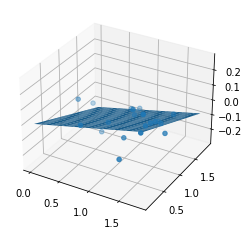

In [113]:
l1 = LinearRegression3D(x, y, z, p)
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.scatter(x, y, z)

x_grid = np.linspace(min(x), max(x), len(x))
y_grid = np.linspace(min(y), max(y), len(y))
X, Y = np.meshgrid(x_grid, y_grid)
z = l1.get_func_value(X, Y)

ax.plot_surface(X, Y, z)


In [114]:
test = np.array([1, 2, 3, 4])
test

array([1, 2, 3, 4])

In [115]:
test - 1

array([0, 1, 2, 3])